# Keras intro exercises

## 1. Build a simple sequential model

* Can you build a sequential model to reproduce the graph shown in the figure? 
* Assume that this is a classifier
* Choose whatever activations you want, wherever possible
* How many classes are we predicting?

<center><img src="figures/sequence_api_exercise.png"></center>

In [ ]:
#!wget https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/exercises.ipynb
!mkdir figures
!wget -P figures/ https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/figures/sequence_api_exercise.png

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784, name="Dense"))
model.add(Dense(units=64, activation='relu', name="dense_1"))
model.add(Dense(units=10, activation='softmax', name="dense_2"))

2023-03-20 15:46:37.121579: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-20 15:46:37.122137: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 15:46:37.123102: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


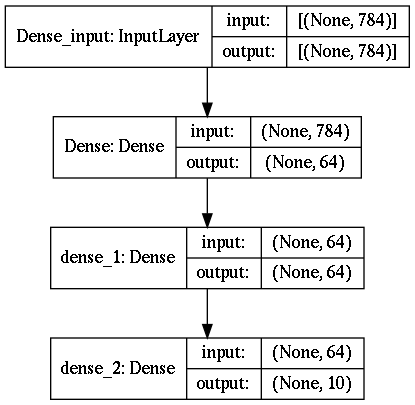

In [2]:
from tensorflow.keras.utils import plot_model

#Add your model here

plot_model(model, "figures/exercise_model.png", show_shapes=True)

## 2. Build a better XOR classifier

Given the model seen at lecture, how do we make a better classifier (higher accuracy)?

* More layers? More neurons?
* Generate more data?
* More epochs?
* Different batch size?
* Different optimizer?
* It's up to you! Let's see who does best on validation

Only for Tuesday's session:

* Different activations?
* Add Dropout? How large?

Training curve plotting function:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_loss_acc(history):
    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'val acc', 'train loss', 'val loss'], loc='upper left')
    plt.show()

Data generation step:

In [8]:
# Generate XOR data
data = np.random.random((1000000, 3)) - 0.5
labels = np.zeros((1000000, 1))

labels[np.where(np.logical_xor(np.logical_xor(data[:,0] > 0, data[:,1] > 0), data[:,2] > 0))] = 1

#let's print some data and the corresponding label to check that they match the table above
for x in range(3):
    print("{0: .2f} xor {1: .2f} xor {2: .2f} equals {3:}".format(data[x,0], data[x,1], data[x,2], labels[x,0]))

-0.37 xor  0.21 xor -0.22 equals 1.0
 0.20 xor -0.29 xor  0.44 equals 0.0
-0.44 xor -0.33 xor -0.45 equals 0.0



The baseline network to improve:

In [9]:
model = Sequential()
model.add(Dense(units=10, activation='tanh', input_dim=3))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(data, labels, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
7032/7032 [==============================] - 11s 1ms/step - loss: 0.4865 - accuracy: 0.7417 - val_loss: 0.0967 - val_accuracy: 0.9761
Epoch 2/30
7032/7032 [==============================] - 15s 2ms/step - loss: 0.0709 - accuracy: 0.9829 - val_loss: 0.0287 - val_accuracy: 0.9952
Epoch 3/30
7032/7032 [==============================] - 17s 2ms/step - loss: 0.0237 - accuracy: 0.9962 - val_loss: 0.0136 - val_accuracy: 0.9980
Epoch 4/30
7032/7032 [==============================] - 16s 2ms/step - loss: 0.0124 - accuracy: 0.9979 - val_loss: 0.0084 - val_accuracy: 0.9985
Epoch 5/30
7032/7032 [==============================] - 17s 2ms/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 6/30
7032/7032 [==============================] - 16s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 7/30
7032/7032 [==============================] - 17s 2ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0036 - val_ac

KeyboardInterrupt: 

In [ ]:
#Add your model here

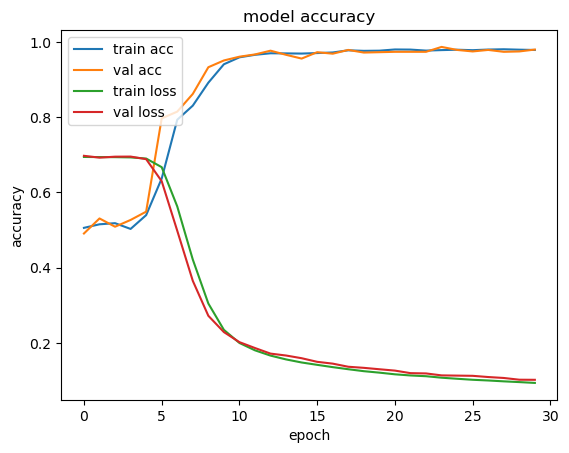

In [10]:
plot_loss_acc(history)

## 3. Build a regression model

* Take the Boston housing dataset (http://lib.stat.cmu.edu/datasets/boston)
* Records a set of variables for a set of houses in Boston, including among others:
    * CRIM     per capita crime rate by town
    * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS    proportion of non-retail business acres per town
    * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * NOX      nitric oxides concentration (parts per 10 million)
    * RM       average number of rooms per dwelling
* Can we use these variables to predict the value of a house (in tens of thousands of dollars)?

In [21]:
import tensorflow
from sklearn.preprocessing import StandardScaler #hint

#This is how we load the dataset, pre-split in training/validation sets
(X_train, y_train), (X_val, y_val) = tensorflow.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

#Let's have a look at the data
print(X_train.shape)
print(X_train[0], y_train[0])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# Add your model here
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=13))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam',                    #adaptive learning rate method
              loss='mean_absolute_error', metrics=["mean_absolute_error"]) 

history = model.fit(X_train, y_train, batch_size=16, epochs=200, validation_data=(X_val, y_val))

(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2
Epoch 1/200
26/26 [==============================] - 1s 11ms/step - loss: 21.6109 - mean_absolute_error: 21.6109 - val_loss: 22.4583 - val_mean_absolute_error: 22.4583
Epoch 2/200
26/26 [==============================] - 0s 6ms/step - loss: 21.5772 - mean_absolute_error: 21.5772 - val_loss: 22.1258 - val_mean_absolute_error: 22.1258
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 21.3992 - mean_absolute_error: 21.3992 - val_loss: 21.6760 - val_mean_absolute_error: 21.6760
Epoch 4/200
26/26 [==============================] - 0s 8ms/step - loss: 20.4030 - mean_absolute_error: 20.4030 - val_loss: 21.1131 - val_mean_absolute_error: 21.1131
Epoch 5/200
26/26 [==============================] - 0s 7ms/step - loss: 19.9874 - mean_absolute_error: 19.9874 - val_loss: 20.4033 - val_mean_absolute_error: 20.4033
Epoch 6/200
26/26 [=

Epoch 50/200
26/26 [==============================] - 0s 6ms/step - loss: 3.0027 - mean_absolute_error: 3.0027 - val_loss: 3.9250 - val_mean_absolute_error: 3.9250
Epoch 51/200
26/26 [==============================] - 0s 7ms/step - loss: 2.9999 - mean_absolute_error: 2.9999 - val_loss: 3.8946 - val_mean_absolute_error: 3.8946
Epoch 52/200
26/26 [==============================] - 0s 7ms/step - loss: 2.9025 - mean_absolute_error: 2.9025 - val_loss: 3.8765 - val_mean_absolute_error: 3.8765
Epoch 53/200
26/26 [==============================] - 0s 6ms/step - loss: 3.3828 - mean_absolute_error: 3.3828 - val_loss: 3.8243 - val_mean_absolute_error: 3.8243
Epoch 54/200
26/26 [==============================] - 0s 4ms/step - loss: 2.8655 - mean_absolute_error: 2.8655 - val_loss: 3.8114 - val_mean_absolute_error: 3.8114
Epoch 55/200
26/26 [==============================] - 0s 6ms/step - loss: 3.0028 - mean_absolute_error: 3.0028 - val_loss: 3.7765 - val_mean_absolute_error: 3.7765
Epoch 56/200
26/

Epoch 100/200
26/26 [==============================] - 0s 9ms/step - loss: 2.1062 - mean_absolute_error: 2.1062 - val_loss: 2.9691 - val_mean_absolute_error: 2.9691
Epoch 101/200
26/26 [==============================] - 0s 9ms/step - loss: 2.3449 - mean_absolute_error: 2.3449 - val_loss: 2.9415 - val_mean_absolute_error: 2.9415
Epoch 102/200
26/26 [==============================] - 0s 10ms/step - loss: 2.2614 - mean_absolute_error: 2.2614 - val_loss: 2.9312 - val_mean_absolute_error: 2.9312
Epoch 103/200
26/26 [==============================] - 0s 10ms/step - loss: 2.5561 - mean_absolute_error: 2.5561 - val_loss: 2.9332 - val_mean_absolute_error: 2.9332
Epoch 104/200
26/26 [==============================] - 0s 8ms/step - loss: 2.5775 - mean_absolute_error: 2.5775 - val_loss: 2.9219 - val_mean_absolute_error: 2.9219
Epoch 105/200
26/26 [==============================] - 0s 9ms/step - loss: 2.1406 - mean_absolute_error: 2.1406 - val_loss: 2.9346 - val_mean_absolute_error: 2.9346
Epoch 10

26/26 [==============================] - 0s 9ms/step - loss: 2.1192 - mean_absolute_error: 2.1192 - val_loss: 2.7636 - val_mean_absolute_error: 2.7636
Epoch 150/200
26/26 [==============================] - 0s 8ms/step - loss: 1.9302 - mean_absolute_error: 1.9302 - val_loss: 2.7525 - val_mean_absolute_error: 2.7525
Epoch 151/200
26/26 [==============================] - 0s 9ms/step - loss: 2.0195 - mean_absolute_error: 2.0195 - val_loss: 2.7480 - val_mean_absolute_error: 2.7480
Epoch 152/200
26/26 [==============================] - 0s 13ms/step - loss: 1.9020 - mean_absolute_error: 1.9020 - val_loss: 2.7630 - val_mean_absolute_error: 2.7630
Epoch 153/200
26/26 [==============================] - 0s 5ms/step - loss: 2.0030 - mean_absolute_error: 2.0030 - val_loss: 2.7461 - val_mean_absolute_error: 2.7461
Epoch 154/200
26/26 [==============================] - 0s 6ms/step - loss: 1.9754 - mean_absolute_error: 1.9754 - val_loss: 2.7432 - val_mean_absolute_error: 2.7432
Epoch 155/200
26/26 [==

26/26 [==============================] - 0s 11ms/step - loss: 1.9983 - mean_absolute_error: 1.9983 - val_loss: 2.7687 - val_mean_absolute_error: 2.7687
Epoch 199/200
26/26 [==============================] - 0s 7ms/step - loss: 1.8042 - mean_absolute_error: 1.8042 - val_loss: 2.7898 - val_mean_absolute_error: 2.7898
Epoch 200/200
26/26 [==============================] - 0s 6ms/step - loss: 1.7373 - mean_absolute_error: 1.7373 - val_loss: 2.7827 - val_mean_absolute_error: 2.7827


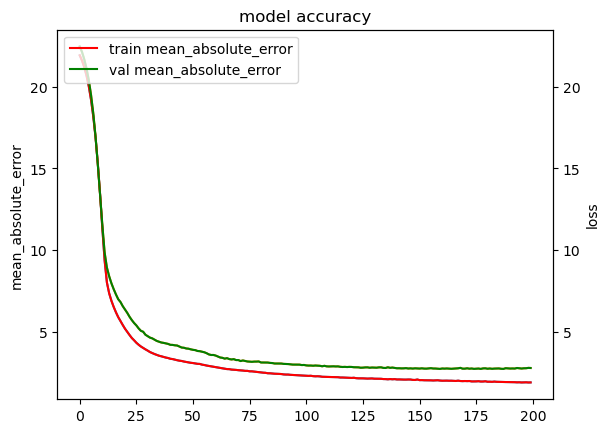

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_loss_mae(history, metric):
    
    fig,ax = plt.subplots()
    ax.plot(history.history[metric])
    ax.plot(history.history['val_' + metric])
    ax.set_ylabel(metric)
    ax2=ax.twinx()
    ax2.plot(history.history['loss'], c="red")
    ax2.plot(history.history['val_loss'], c="green")
    ax2.set_ylabel("loss")
    plt.title('model accuracy')
    #plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train ' + metric, 'val ' + metric, 'train loss', 'val loss'], loc='upper left')
    plt.show()
    
plot_loss_mae(history, "mean_absolute_error")

## 4. The IMDB movie review sentiment dataset

Another pre-package toy dataset from Keras. Contains 25k reviews for a movies in IMDB, you want to predict whether the review is positive or negative.

> each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

https://keras.io/api/datasets/imdb/

Load the dataset, set a couple of important parameters (max_features, maxlen). Also pad all reviews with less than 200 words so that they have all the same length.

In [38]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, padding="post")
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen, padding="post")


25000 Training sequences
25000 Validation sequences


Since the dataset is pre-processed so that each word is represented by an integer, we have to build a reverse dictionary if we want to actually read some of the reviews:

In [39]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)

inverted_word_index[0] = ""
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset


In [ ]:
print([i for i in x_train[2]])

In [ ]:
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[2])
print(decoded_sequence)

How do we build a predictor for this task?

In [ ]:
model = Sequential()
...